In [ ]:
# !pip install pdfminer.six
# !pip install nltk
# !pip install PyPDF2
# !pip install easytextract
# !pip install pdfminer
# !pip install pymorphy2
# !pip install seaborn
# !pip install python-docx
# !pip install pymystem3
# !pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive

import PyPDF2
import docx

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

import pandas as pd
import numpy as np
import pymorphy2
import re
import string
import os

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pymystem3 import Mystem
import pymystem3
mystem_analyzer = Mystem()

from pymorphy2 import MorphAnalyzer

from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer


nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files = os.listdir('/content/drive/My Drive/Датафрейм части')

In [ ]:
df = pd.DataFrame()

In [ ]:
path = '/content/drive/My Drive/Датафрейм части'
for file in files:
    df = pd.concat([df, pd.read_csv(f'{path}/{file}')])

In [ ]:
df = df.reset_index(drop=True)

<Axes: xlabel='faculty'>

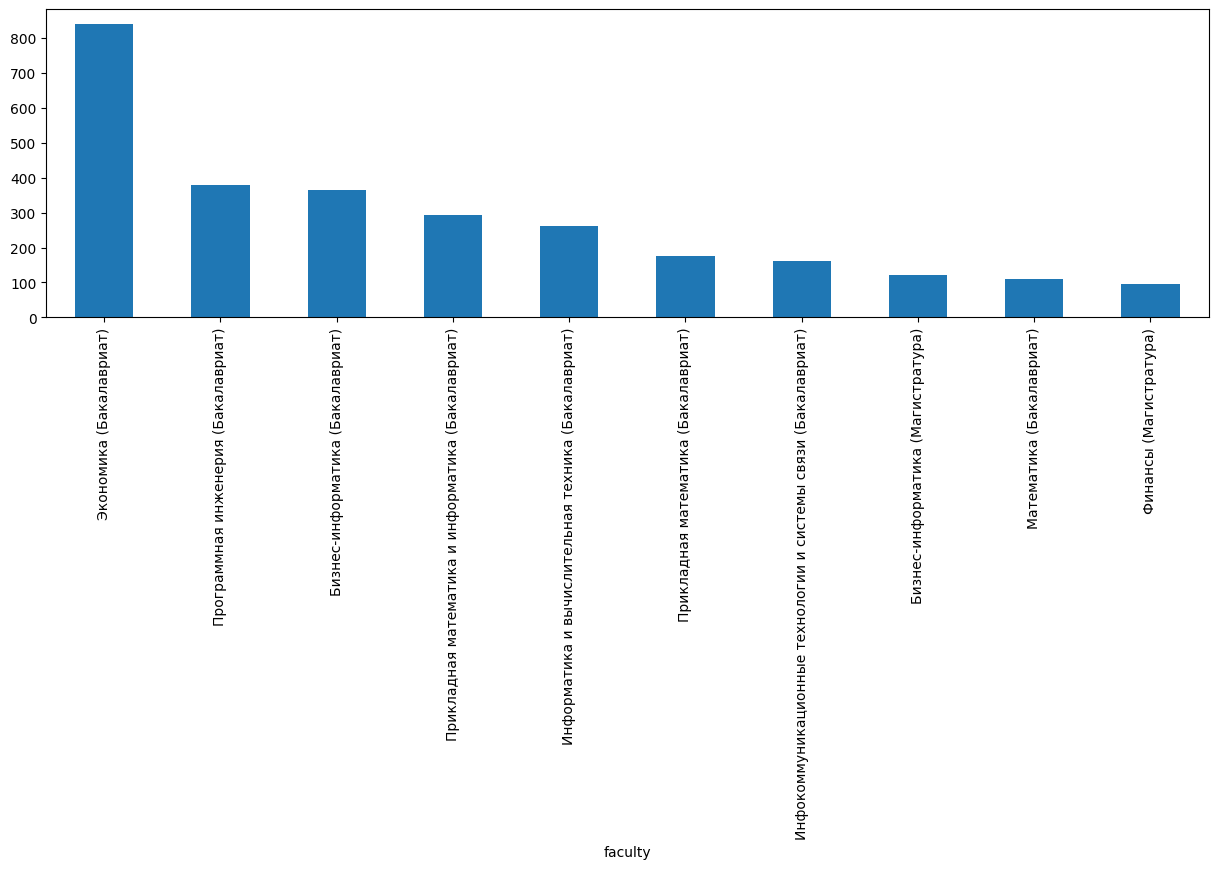

In [ ]:
plt.figure(figsize=(15,4))
df.faculty.value_counts().sort_values()[::-1][:10].plot.bar()

In [ ]:
df.score.value_counts()

score
8     1284
9     1006
7      703
10     632
Name: count, dtype: int64

In [ ]:
df = df.drop(index=3)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
def trim_text(text):
    match = re.search(r'(Москва, 20|Пермь, 20|Нижний Новгород, 20|Санкт-Петербург, 20|Москва 20|Пермь 20|Нижний Новгород 20|Санкт-Петербург 20)', text)
    if match:
        return text[match.start()+19:]
    else:
        return text

In [ ]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

def Text_processing(text):
    text = text.lower()
    text = remove_chars_from_text(text, string.punctuation) #удаление знаком пунктуации
    text = remove_chars_from_text(text, string.digits) #удаление цифр

    text_bin = text
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)

    #text = list(set(text))

    text = [i for i in text if i not in stopwords.words('russian')] #удаление стоп слов, которые присутствуют в русском языке
    text = [i for i in text if i not in stopwords.words('english')] #удаление стоп слов, которые присутствуют в английском языке

    text = ' '.join([str(elem) for elem in text])
    text = mystem_analyzer.lemmatize(text) #Лемматизируем текст

    text = [w for w in text if (w != ' ')]
    text = [i for i in text if (len(i) > 3)]
    return text

In [ ]:
# from wordcloud import WordCloud

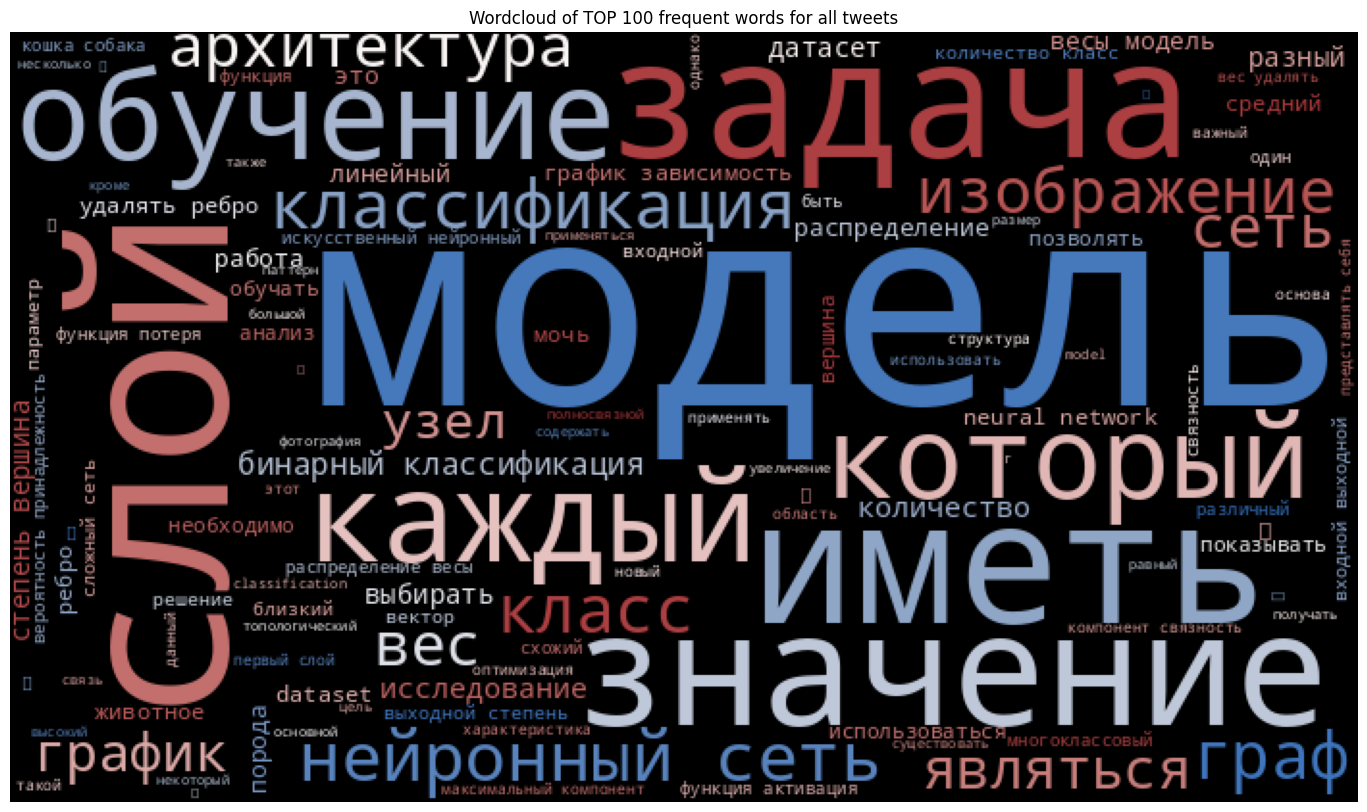

In [ ]:
# wordcloud = WordCloud(width=700, height=400, max_font_size=150, max_words=120, colormap='vlag',
#                       background_color="black", collocations=True).generate(text)

# # Визуализация
# plt.figure(figsize=(20,10))
# plt.imshow(wordcloud)
# plt.title('Wordcloud of TOP 100 frequent words for all tweets')
# plt.axis("off")
# plt.show()

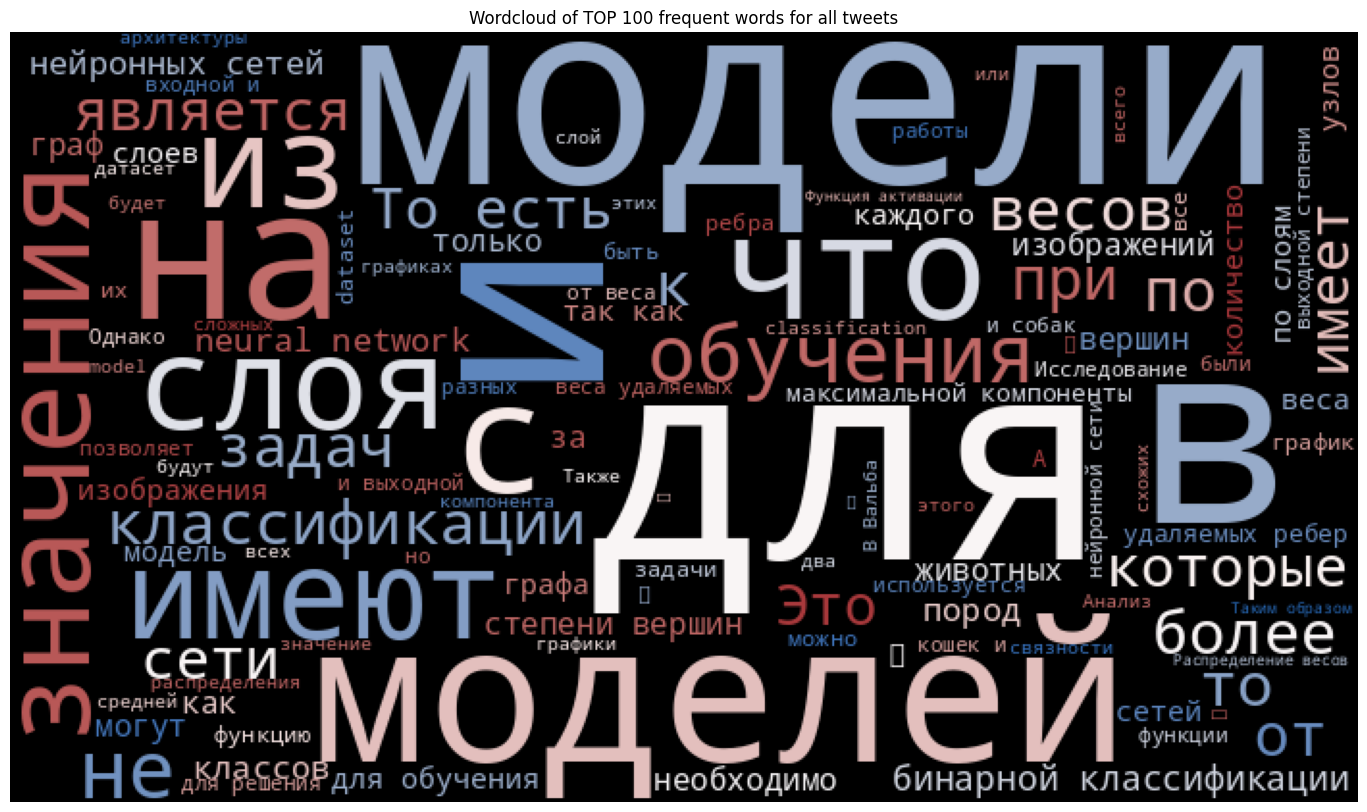

In [ ]:
# wordcloud = WordCloud(width=700, height=400, max_font_size=150, max_words=120, colormap='vlag',
#                       background_color="black", collocations=True).generate(df.iloc[0].text)

# # Визуализация
# plt.figure(figsize=(20,10))
# plt.imshow(wordcloud)
# plt.title('Wordcloud of TOP 100 frequent words for all tweets')
# plt.axis("off")
# plt.show()

In [ ]:
df1 = df.head(100).copy()

In [ ]:
df['text_no_title'] = df['text'].apply(trim_text)
df['prepared_text'] = df['text_no_title'].apply(Text_processing)

In [ ]:
 df

,topic,score,faculty,text,text_no_title,prepared_text
0,Структурные особенности искусственных нейронны...,9,Прикладная математика (Бакалавриат),ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВ...,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,"[правительство, российский, федерация, федерал..."
1,Электронный аукцион с закрытыми ставками на ос...,9,Прикладная математика (Бакалавриат),ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ\nОБРАЗО...,ПРАВИТЕЛЬСТВО РОССИЙСКОЙ ФЕДЕРАЦИИ\n\nФЕДЕРАЛЬ...,"[правительство, российский, федерация, федерал..."
2,Оптимальная инвестиционная стратегия в многоша...,7,Прикладная математика (Бакалавриат),ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВ...,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \...,"[аннотация, работа, исследоваться, многошаговы..."
3,Исследование периодических орбит вокруг точек ...,10,Прикладная математика (Бакалавриат),ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ \nОБР...,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,"[правительство, российский, федерация, федерал..."
4,Электронный атлас проводящих путей головного м...,7,Прикладная математика (Бакалавриат),ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ\nОБРАЗО...,АВИТЕЛЬСТВО РОССИЙСКОЙ ФЕДЕРАЦИИ\nФЕДЕРАЛЬНОЕ ...,"[авительство, российский, федерация, федеральн..."
...,...,...,...,...,...,...
3619,Государственное финансирование как фактор конк...,10,Экономика (Магистратура),Национальный исследовательский университет \nВ...,ение\n\nВведение…………………………………………………………………………3\...,"[ение, введение, глава, вероятность, получать,..."
3620,Конвергенция российских регионов по заработной...,8,Экономика (Магистратура),Национальный исследовательский университет\nВы...,ние\n\nВведение\t3\nГлава 1. Обзор литературы ...,"[введение, глава, обзор, литература, теоретиче..."
3621,Влияние корпоративного управления на стоимость...,10,Экономика (Бакалавриат),Правительство Российской Федерации\nПермский ф...,"е\n\nНа сегодняшний день, вопрос поиска финанс...","[сегодняшний, день, вопрос, поиск, финансирова..."
3622,Влияние статуса гарантирующего поставщика на о...,7,Экономика (Магистратура),ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗО...,ВЕДЕНИЕ\n\n\nДанная работа посвящена оценке ре...,"[ведение, данный, работа, посвящать, оценка, р..."


In [ ]:
len(df.iloc[0]['prepared_text'])

2526

In [ ]:
# Сохранила в колаб потом скачиваю
df.to_csv('Финальный_датафрейм.csv', index=False, escapechar='\\')

In [ ]:
from google.colab import files
files.download('Финальный_датафрейм.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>